<a href="https://colab.research.google.com/github/sahinded/DeepLearning/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
import tensorflow as tf

tf.config.list_physical_devices("GPU") #if it is empty list, the code is not successful to use GPU

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(y_train)

60000

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [7]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [8]:
x_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  

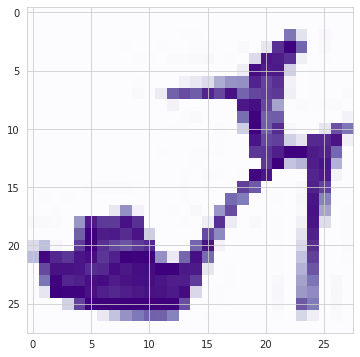

In [9]:

plt.imshow(x_train[9], cmap='Purples')

In [10]:
y_train[9]

5

In [11]:
classes[5]

'Sandal'

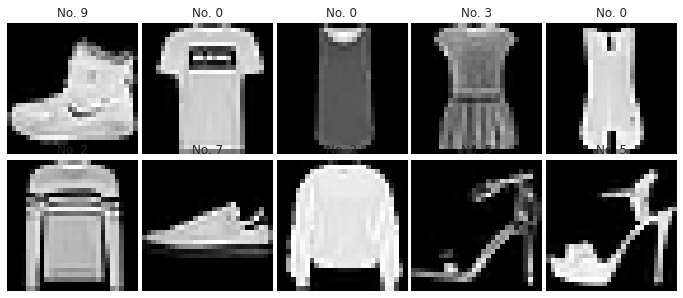

In [12]:

num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( x_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

In [13]:
x_train[9].min()

0

In [14]:
x_train[9].max()

255

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [15]:
# Normalize image pixels
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255 
#this is how we scaled the data at the above, float makes the computation faster 


In [16]:
#Check the max and min after scaling
x_train[9].min()

0.0

In [17]:
#Check the max and min after scaling
x_train[9].max()

1.0

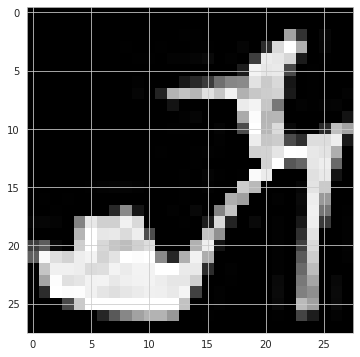

In [18]:
plt.imshow(x_train[9], cmap='gray')

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [19]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [20]:
#x_train.reshape(60000,28,28,1).shape

In [21]:
#x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
Y_train = to_categorical(y_train, 10)  # add data and number of class(in here we have 10 classes above so we need specify 10 on the y-component)
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [24]:
y_train[9]

5

In [25]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [27]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

#you will decide how many filters and the kernel_size 

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1))) 

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 256)               4480256   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 4,483,106
Trainable params: 4,483,106
Non-trainable params: 0
______________________________________________

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

In [31]:
model.fit(x_train, Y_train, batch_size=32, epochs=10, validation_data=(x_test,Y_test),callbacks=[early_stop]) 


Epoch 1/10
1875/1875 [==============================] - 15s 5ms/step - loss: 0.3898 - accuracy: 0.8655 - val_loss: 0.3237 - val_accuracy: 0.8815
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2546 - accuracy: 0.9102 - val_loss: 0.3030 - val_accuracy: 0.8909
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2180 - accuracy: 0.9227 - val_loss: 0.2892 - val_accuracy: 0.9066
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1937 - accuracy: 0.9326 - val_loss: 0.3029 - val_accuracy: 0.9011
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1743 - accuracy: 0.9387 - val_loss: 0.3394 - val_accuracy: 0.9018


In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.390,0.865,0.324,0.882
1,0.255,0.910,0.303,0.891
2,0.218,0.923,0.289,0.907
3,0.194,0.933,0.303,0.901
4,0.174,0.939,0.339,0.902


**TASK 7: Plot values of metrics you used in your model.**

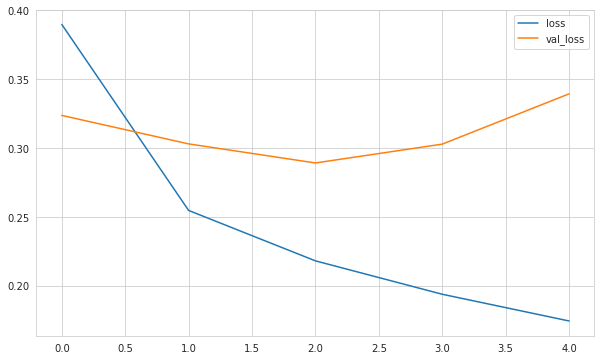

In [34]:
summary[["loss", "val_loss"]].plot();

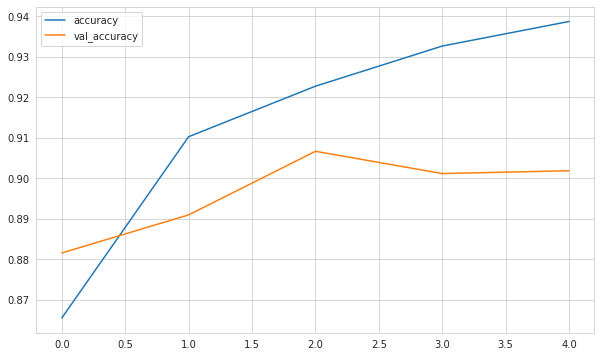

In [35]:
summary[["accuracy", "val_accuracy"]].plot();

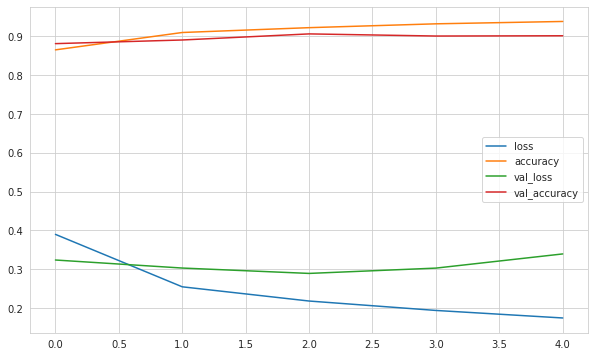

In [36]:
summary.plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
model.evaluate(x_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2892 - accuracy: 0.9066


[0.2891598045825958, 0.9065999984741211]

In [39]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2891598045825958
Test accuracy: 0.9065999984741211


## Prediction

In [40]:
pred_prob = model.predict(x_test)
pred_prob

array([[4.9821523e-08, 9.4992000e-12, 1.5385609e-08, ..., 2.2139364e-05,
        8.1424574e-08, 9.9994910e-01],
       [1.2541681e-05, 1.0815809e-13, 9.9998307e-01, ..., 4.0603656e-13,
        3.9087743e-12, 1.3675125e-13],
       [1.1472397e-09, 1.0000000e+00, 1.5570492e-12, ..., 3.0420443e-15,
        2.1610728e-12, 1.6295925e-13],
       ...,
       [6.5072874e-07, 8.6854792e-14, 2.0743995e-08, ..., 5.8718630e-09,
        9.9991655e-01, 2.5019514e-11],
       [5.3867977e-09, 9.9999952e-01, 2.5755773e-10, ..., 1.5205154e-12,
        1.7474160e-10, 6.0695116e-10],
       [2.0287705e-04, 2.4854478e-06, 3.5180603e-04, ..., 5.8203298e-03,
        3.4838036e-04, 4.0588398e-03]], dtype=float32)

In [41]:
y_pred = np.argmax(pred_prob, axis=1)

In [42]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1000
           1       0.98      0.98      0.98      1000
           2       0.91      0.80      0.85      1000
           3       0.90      0.92      0.91      1000
           4       0.90      0.82      0.86      1000
           5       0.96      0.98      0.97      1000
           6       0.71      0.76      0.73      1000
           7       0.97      0.93      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [44]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [45]:
print(confusion_matrix(y_test, y_pred))

[[921   1   6  13   1   3  52   0   3   0]
 [  2 980   0  14   0   1   3   0   0   0]
 [ 35   2 798  10  46   1 108   0   0   0]
 [ 23   9   4 919  12   1  30   0   2   0]
 [  1   1  36  35 823   2 102   0   0   0]
 [  0   0   0   0   0 985   0   5   0  10]
 [144   5  29  25  35   0 758   0   4   0]
 [  0   0   0   0   0  19   0 931   1  49]
 [  2   2   1   5   0   3  10   5 972   0]
 [  0   0   0   0   0   7   0  14   0 979]]


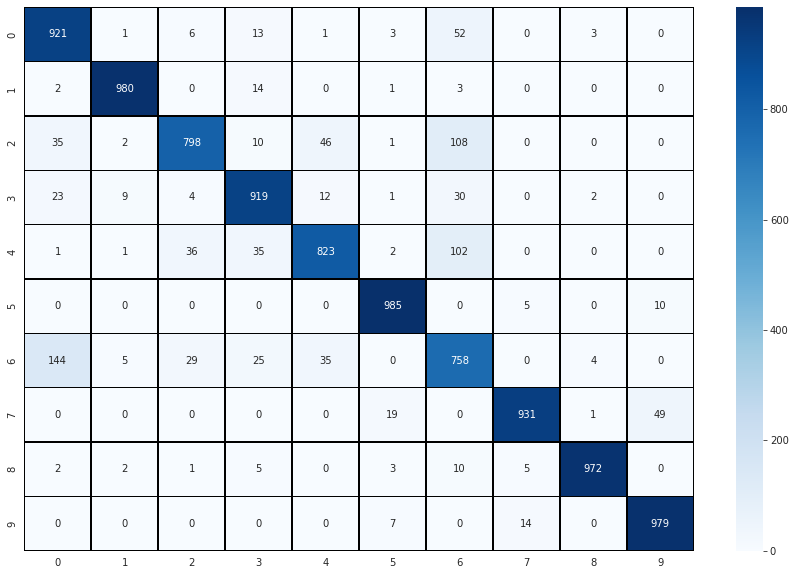

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 10})

Modelling-2

In [47]:
from tensorflow.keras.layers import  Dropout


In [48]:
model1 = Sequential()
model1.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model1.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [49]:
model1.fit(x_train, Y_train, batch_size=32, epochs=10, validation_data=(x_test,Y_test),callbacks=[early_stop]) 

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4183 - accuracy: 0.8560 - val_loss: 0.3128 - val_accuracy: 0.8935
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3014 - accuracy: 0.8962 - val_loss: 0.3073 - val_accuracy: 0.8964
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2873 - accuracy: 0.9010 - val_loss: 0.3202 - val_accuracy: 0.8879
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2810 - accuracy: 0.9031 - val_loss: 0.2989 - val_accuracy: 0.8963


In [50]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 17500)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               4480256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                      

In [51]:
summary1 = pd.DataFrame(model1.history.history)

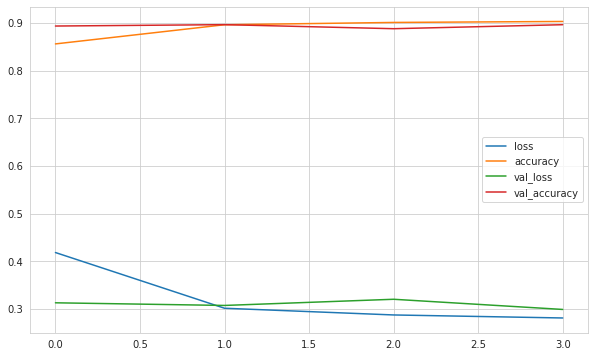

In [52]:
summary1.plot();

In [53]:
score = model1.evaluate(x_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3073 - accuracy: 0.8964
Test loss: 0.30725279450416565
Test accuracy: 0.896399974822998


Prediction

In [88]:
pred_prob = model1.predict(x_test)
pred_prob

array([[5.8799844e-07, 3.1272498e-09, 2.6843645e-07, ..., 9.3378112e-05,
        1.5626256e-05, 9.9962318e-01],
       [2.2486242e-04, 6.7375664e-14, 9.9972790e-01, ..., 2.7140112e-10,
        1.5163323e-08, 7.8190364e-11],
       [6.8769248e-07, 9.9999821e-01, 6.0897531e-09, ..., 2.7081512e-10,
        1.5276591e-08, 6.2236080e-12],
       ...,
       [3.3033098e-07, 6.8647565e-15, 6.3698806e-08, ..., 1.7753473e-09,
        9.9999750e-01, 3.9738751e-10],
       [2.5041477e-06, 9.9982065e-01, 9.4367834e-08, ..., 5.3782272e-09,
        1.9881347e-07, 3.9678505e-09],
       [7.0238784e-03, 1.7451039e-04, 4.6453187e-03, ..., 3.1304744e-01,
        4.5111865e-02, 3.7491843e-02]], dtype=float32)

In [89]:
y_pred = np.argmax(pred_prob, axis=1)

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.96      0.98      1000
           2       0.90      0.78      0.83      1000
           3       0.89      0.90      0.90      1000
           4       0.82      0.85      0.84      1000
           5       0.97      0.97      0.97      1000
           6       0.70      0.72      0.71      1000
           7       0.96      0.94      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [91]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [92]:
print(confusion_matrix(y_test, y_pred))

[[874   0   8  15   5   2  92   0   4   0]
 [  5 962   0  23   2   0   4   0   4   0]
 [ 19   0 779   8  91   1  99   0   3   0]
 [ 24   3   4 900  28   0  39   0   2   0]
 [  1   2  37  29 851   1  78   0   1   0]
 [  0   0   0   0   0 972   0  17   0  11]
 [132   0  39  28  60   0 725   0  16   0]
 [  0   0   0   0   0  14   0 944   1  41]
 [  2   0   0   3   1   2   4   4 984   0]
 [  0   0   0   0   0   6   0  20   1 973]]


In [93]:
sample = x_test[9]

In [94]:
sample.shape

(28, 28)

In [58]:
#plt.imshow(np.expand_dims(sample, axis=0))

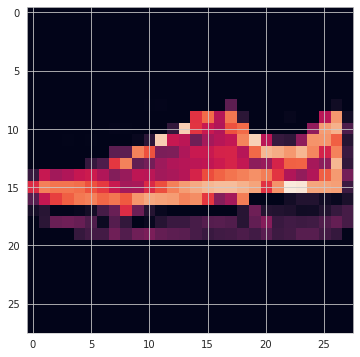

In [95]:
plt.imshow(sample)

In [96]:
sample[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [97]:
sample.shape

(28, 28)

In [98]:
image_prediction = model1.predict(sample.reshape(1,28,28,1))

In [99]:
image_prediction

array([[1.9841204e-08, 4.5444714e-11, 1.5386378e-08, 4.4188364e-09,
        9.2814118e-10, 6.9510197e-06, 6.7740746e-10, 9.9999142e-01,
        4.5009091e-07, 1.2756790e-06]], dtype=float32)

In [100]:
np.argmax(image_prediction,axis=1)

array([7])

In [101]:
result=np.argmax(image_prediction, axis=1)

In [102]:
result

array([7])

In [103]:
classes[int(result)]

'Sneaker'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___